In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt # for plotting
import numpy as np # for matrix and vector computations
import pandas as pd
import seaborn as sns

implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file Data/ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

## 1) Load the Dataset


In [2]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,:-1]
y = data[:,-1]

m = y.size # number of training samples

In [3]:
# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X1', 'X2', 'y'))
print('-'*26)

for i in range(10): # say first 10 points
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

      X1      X2         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


## 2) Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.

At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [ ]:
 """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n) dimensions (imp*: x0=1 is not added during feature scaling)
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    a sample. You need to perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """

In [5]:
# X.shape[1] --> size=2 which means 2 features

def featureNormalize(X):
  # Set values
  X_norm = X.copy() 
  mu = np.zeros(X.shape[1])
  sigma = np.zeros(X.shape[1])

  # to do feature scaling separtely for each feature, take each row of the features at a time 
  mu = np.mean(X,axis=0)
  sigma = np.std(X,axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [6]:
X_norm, mu, sigma = featureNormalize(X)

print(f"Computed Mean: {mu}")
print(f"Computed Standard deviation: {sigma}")

# we are getting 2 values of mean and sigma --> corresponding to 2 features of the dataset

# we are also getting X_norm --> Feature scaled values of X

Computed Mean: [2000.68085106    3.17021277]
Computed Standard deviation: [7.86202619e+02 7.52842809e-01]


## 3) Gradient Descent

the hypothesis function and the batch gradient descent update
rule remain unchanged, as it was for simple linear regression.

You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

### 3.1 Update Equations

The objective of linear regression is to minimize the cost function $J(\theta)$

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the **batch gradient descent algorithm**. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each sample as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [7]:
#### Add a column of ones to X. The numpy function concatenate() joins arrays along a given axis. 

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# ones will have m rows and 1 column

<a id="section2"></a>
### 3.2 Computing the cost $J(\theta)$

As you perform gradient descent to minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. Implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the samples from the training set (feature) and $y$ (label) is a vector whose each element represent the value at a given row of $X$.
<a id="computeCost"></a>

In [ ]:
 """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """

In [9]:
def computeCost(X,y,theta):
  m = y.size # no. of training samples
  J = 0

  h = np.dot(X,theta) # X and theta are matrices
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

<a id="section3"></a>
### 3.3 Gradient descent

Complete a function which Implements gradient descent. Update $\theta$ with each iteration of the loop. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. 

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

In [ ]:
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ), i.e. (mx1) dimensions
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ), i.e. (n+1)x1 dimensions
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ). This is the optimal theta
        for which J is minimum
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """

In [11]:
def gradient_descent(X,y,theta,alpha,num_iters):
  m = y.size # or y.shape[0] # number of training samples

  # make a copy of theta, to avoid changing the original array, since numpy arrays are passed by reference to functions
  theta = theta.copy()

  J_history = [] # Use a python list to store cost in every iteration

  for i in range(num_iters):
    theta = theta - (alpha/m) * (np.dot(X,theta) - y).dot(X)
    # print(theta)

    # save the cost J in every iteration
    min_cost = computeCost(X,y,theta)
    J_history.append(min_cost)
    # print(J_history[i])

  return theta, J_history # theta will return values equivalent to the no. of features available

In [12]:
# randomly initialize fitting parameters
theta = np.zeros(3) # 3 for 3 features

# some gradient descent settings
iterations = 400
alpha = 0.1

theta, J_history = gradient_descent(X,y,theta,alpha,iterations)

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]


### 3.4) Predict values 

predict the price of a 1650 sq-ft, 3 bedroom house.

**At prediction, make sure you do the same feature normalization**

In [13]:
# Recall that the first column of X (column 0) is all-ones(x0=1)
# Thus, it does not need to be normalized.

X_array = [1,1650,3]
X_array[1:3] = (X_array[1:3] - mu)/sigma
# X_array[1:3] contains features after feature scaling

# Predict
price = np.dot(X_array,theta) # theta here is the optimal theta

print(f'Predicted price of a 1650 sq-ft, 3 bedroom house (using gradient descent): ${price:.0f} ')

Predicted price of a 1650 sq-ft, 3 bedroom house (using gradient descent): $293081 


## 4) Selecting Learning Rates

Try out different learning rates for the dataset and find a learning rate that converges quickly. 

run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.


If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>


Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Using the best learning rate that you found, run gradient descent until convergence to find the final values of $\theta$. 

Text(0, 0.5, 'Cost J(theta)')

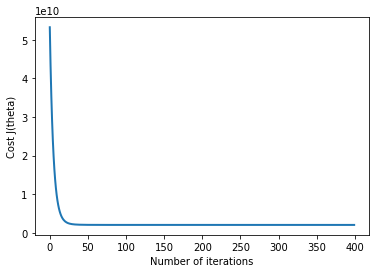

In [14]:
# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J(theta)')

## 5) Normal Equations

the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [15]:
# Load a new set of data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,:-1]
y = data[:,-1]

m = y.size # no. of training sample

# Add x0=1 -> add a column of 1s to X matrix
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
 """
    Computes the closed-form solution to linear regression using the normal equation.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    
    function `np.linalg.pinv` for computing matrix inverse.
    """

In [19]:
# X.shape[1] --> 3 features

def normalEqn(X,y):
  theta = np.zeros(X.shape[1])

  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

  return theta # theta will return 3 values of optimal theta0,theta1,theta2 --> corresponding to 3 features

In [20]:
# Calculate the parameters from the normal equation
theta = normalEqn(X,y)

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]


In [21]:
# Prediction - Estimate the price of a 1650 sq-ft, 3 br house

X_array = [1,1650,3]
X_array[1:3] = (X_array[1:3] - mu)/sigma
# X_array[1:3] contains features after feature scaling

# Predict
price = np.dot(X_array,theta) # theta here is the optimal theta

print(f'Predicted price of a 1650 sq-ft, 3 bedroom house (using gradient descent): ${price:.0f} ')

Predicted price of a 1650 sq-ft, 3 bedroom house (using gradient descent): $91511 


## Conclusion

From gradient descent, prediction is $293,081

From normal equation, prediction is $91,511

* So which is correct?

Both can be used for linear regression. 
However, size of the dataset in this case was less, so Normal Equation will give a correct answer

If size of the dataset is more, say 10,000 rows, then Gradient Descent will give a correct answer (Normal equations don't work with huge number of data)